# **Housing- regression**

Linear Regression: MSE=0.56, R2=0.58
Random Forest Regressor: MSE=0.25, R2=0.81

Model Comparison:
                              MSE        R2
Linear Regression        0.555892  0.575788
Random Forest Regressor  0.253996  0.806170


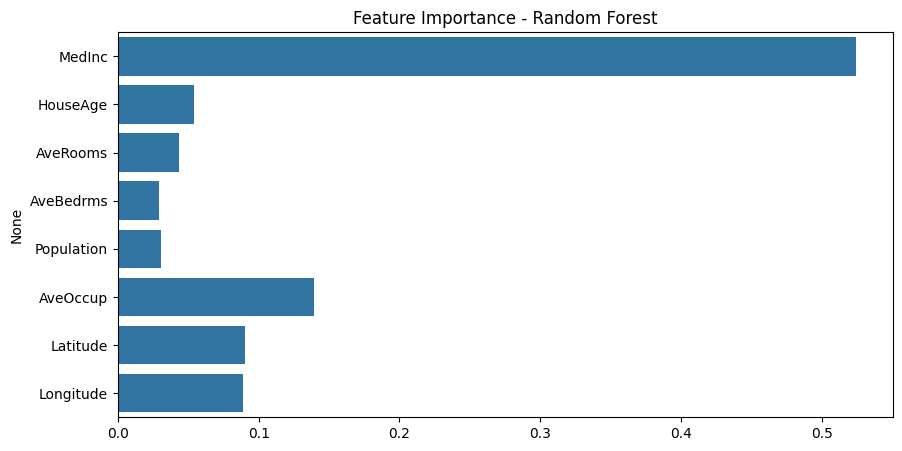

In [1]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 2. Load Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 📌 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📌 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 5. Train Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name}: MSE={mse:.2f}, R2={r2:.2f}")

# 📌 6. Compare Model Performance
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# 📌 7. Feature Importance (Random Forest)
rf_model = models["Random Forest Regressor"]
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()
